<a href="https://colab.research.google.com/github/H1103/Project-113-Data-Story-2/blob/main/Project_113_Data_Story_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
data_to_load = files.upload()

Saving savings_data.csv to savings_data.csv


In [ ]:
import pandas as pd
import statistics
import plotly.express as px
import numpy as np
import csv

df = pd.read_csv("savings_data.csv")
fig = px.scatter(df, y ="quant_saved", color = "wealthy")
fig.show()

If you look at this data you can see that the yellow dots are the ones who are given a reminder to save while the blue ones aren't hence the blue dots are the ones who are outliers and save more. Let's see how many people were given a reminder vs the people who aren't given a reminder.

In [ ]:
import csv

with open("savings_data.csv", newline="")as f:
  reader = csv.reader(f)
  savings_data = list(reader)
  savings_data.pop(0)
  # finding the total number of people vs the people who were reminded
  total_entry = len(savings_data)
  total_people_given_a_reminder = 0
  # # using this for loop on savings_data every time when a user has a value of 1 that means 
    # he has been reminded we increase the count of people reminded by 1
    # to find the number of people who were not given reminders we will subtract the total number
    # of entries - the total number of people who were given reminders #
  for data in savings_data:
    if int(data[3]) == 1:
      total_people_given_a_reminder += 1

import plotly.graph_objects as go

fig = go.Figure(go.Bar(x = ["reminded", "not reminded"], y = [total_people_given_a_reminder, (total_entry - total_people_given_a_reminder)]))
fig.show()


Here we can see that approximately 3000 people were reminded compared to 10,500 people(approx.) who weren't reminded to save money.

Now, let's see the mean,median and mode of the savings of the data.

In [ ]:
# calculating the mean,median and mode 
all_savings = []
for data in savings_data:
  all_savings.append(float(data[0]))
print(f"mean of savings :- {statistics.mean(all_savings)}")
print(f"median of savings :- {statistics.median(all_savings)}")
print(f"mode of savings :- {statistics.mode(all_savings)}")

mean of savings :- 85.32780331328739
median of savings :- 39.2724
mode of savings :- 0.0


Now these are some very interesting results. The mean, median and mode are not same and world apart. Can you guess? If you look at the scatter plot we will see that majority of the savings data lie between 0 to 1000. Now since we have some outliers which are majority of blue dots hence our mean has significantly increased form the median. Since it is the sum of all values by total entries. Sincethe outliers are away from the crowd the difference is huge. Similarly, for mode in our data there are a lot of people who didn't save at all thus the mode of data is 0. Let's see if we have a similar difference between the mean, median and mode who aren't reminded vs who are reminded.

In [ ]:
# mean,median and mode of savings
reminded_savings = []
not_reminded_savings = []

for data in savings_data:
  if int(data[3]) == 1:
    reminded_savings.append(float(data[0]))
  else:
    not_reminded_savings.append(float(data[0]))

print("Result for people who were reminded to save")
print(f"Mean of savings :-{statistics.mean(reminded_savings)}")
print(f"Median of savings :-{statistics.median(reminded_savings)}")
print(f"Mode of savings :-{statistics.mode(reminded_savings)}")
# to add new lines
print("\n\n")
print("Result for people who were not reminded to save")
print(f"Mean of savings :-{statistics.mean(not_reminded_savings)}")
print(f"Median of savings :-{statistics.median(not_reminded_savings)}")
print(f"Mode of savings :-{statistics.mode(not_reminded_savings)}")

Result for people who were reminded to save
Mean of savings :-78.61157672384391
Median of savings :-39.2724
Mode of savings :-2.284



Result for people who were not reminded to save
Mean of savings :-87.22929365730847
Median of savings :-39.2724
Mode of savings :-0.0


Again there seems to be a massive difference between the mean,median and mode of savings of people who were both reminded and not reminded.

Calculation of the standard deviation of the data.

In [ ]:

print(f"standard deviation of all data:- {statistics.stdev(all_savings)}")
print(f"standard deviation of all who were reminded:- {statistics.stdev(reminded_savings)}")
print(f"standard deviation of all who were not reminded:- {statistics.stdev(not_reminded_savings)}")

standard deviation of all data:- 196.75453011909315
standard deviation of all who were reminded:- 164.58072141099734
standard deviation of all who were not reminded:- 204.91519933877308


here we can see that the standard deviation varies a lot in all 3 types of data. It is higher for the people who weren't reminded vs the people who were reminded. Looking at the data up till now we can assume that reminding people to save money didn't have a significant effect. From standard deviation we can see that people who were not reminded have much more scattered data than most people who were reminded. The question is, does this data have a correlation? Let's see if the savings are correlated to the age of the people. Note:- The columns that have age as 0 will not be considered as their age is missing. No one can be saving at the age of 0.

In our data set the first column is for savings and the last column is for age. And we don't want a saving where the age is 0 hence we will write an if condition where we will check if thew value is in the 5th column is 0. if it is 0 we will skip and if it isn't we append those values in age and savings list respectively. Using the corrcoef() of numpy we will calculate the correlation between them

Because of this, our chart is skewed to the left side. This means that majority of the data, instead of lying on the center, lies in the left side of the chart.

To deal with this, we can remove the outliers. There is a method known as the IQR (Interquartile Range) method. We will use this.



Let's first check the outliers:- 

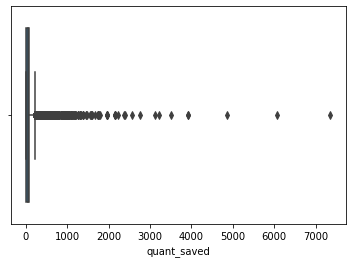

In [ ]:
import seaborn as sns

sns.boxplot(data=df, x=df["quant_saved"])

Here, we can see that the majority of the data is represented by a thick, long black line. We then have a thin long black line and finally we have a horizontal line, which is the rest of the data.


Here, the thin black vertical line is the line that seperates the data we should use to do our analysis. Let's remove the outliers first.

In [ ]:
q1 = df["quant_saved"].quantile(0.25)
q3 = df["quant_saved"].quantile(0.75)
iqr = q3-q1

print(f"Q1 - {q1}")
print(f"Q3 - {q3}")
print(f"IQR - {iqr}")

lower_whisker = q1 - 1.5*iqr
upper_whisker = q3 + 1.5*iqr

print(f"Lower Whisker - {lower_whisker}")
print(f"Upper Whisker - {upper_whisker}")

#Creating a new DataFrame
new_df = df[df["quant_saved"] < upper_whisker]

Q1 - 2.2840000000000003
Q3 - 86.514
IQR - 84.22999999999999
Lower Whisker - -124.06099999999998
Upper Whisker - 212.85899999999998


Here we can say, roughly 213 is an outlier in this data.

Now that we've dealt with the outliers, let's see what our mean, median and modes are and also, if we have a normal distribution now. Let's also check the standard deviation now.

In [ ]:
import plotly.figure_factory as ff

#Mean, median and mode of savings
all_savings = new_df["quant_saved"].tolist()

print(f"Mean of savings - {statistics.mean(all_savings)}")
print(f"Median of savings - {statistics.median(all_savings)}")
print(f"Mode of savings - {statistics.mode(all_savings)}")
print(f"Standard deviation in savings - {statistics.stdev(all_savings)}")

fig = ff.create_distplot([new_df["quant_saved"].tolist()], ["Savings"], show_hist=False)
fig.show()

Mean of savings - 46.200519389818794
Median of savings - 36.0475
Mode of savings - 0.0
Standard deviation in savings - 50.866871917288634


In [ ]:
#Collecting 1000 samples of 100 data points each, saving their averages in a list
import random

sampling_mean_list = []
for i in range(1000):
  temp_list = []
  for j in range(100):
    temp_list.append(random.choice(all_savings))
  sampling_mean_list.append(statistics.mean(temp_list))

mean_sampling = statistics.mean(sampling_mean_list)

fig = ff.create_distplot([sampling_mean_list], ["Savings"], show_hist=False)
fig.add_trace(go.Scatter(x=[mean_sampling, mean_sampling], y=[0, 0.1], mode="lines", name="mean"))
fig.show()

Here, we have a nice bell curve for normal distribution when doing the sampling. Let's also calculate the standard deviation of this normal sampling distribution

In [ ]:
print(f"Standard deviation of the sampling data - {statistics.stdev(sampling_mean_list)}")

Standard deviation of the sampling data - 5.248780824000083


Let's also compare the mean of the population and the sampling -

In [ ]:
print(f"Mean of Population - {statistics.mean(all_savings)}")
print(f"Mean of Sampling Distribution - {mean_sampling}")

Mean of Population - 46.200519389818794
Mean of Sampling Distribution - 45.95974320750684


 They come out to be exactly the same.

Let's do one final check, by trying to find the correlation between the age and the savings with the new data from which we have removed the outliers!

In [ ]:
#temp_df will have the rows where age is not 0
temp_df = new_df[new_df.wealthy != 3]

age = temp_df["wealthy"].tolist()
savings = temp_df["quant_saved"].tolist()

correlation = np.corrcoef(age, savings)
print(f"Correlation between the wealth of the person and their savings is - {correlation[0,1]}")

Correlation between the wealth of the person and their savings is - 0.024030725536925698


We still have a correlation of 0.025 which isn't significant.

Now, let's get back to the real question. Does reminder have any impact on the savings of the people? How can we achieve this statistically?


With the z-test! We will take a sample from the people who were given reminders and see if that sample fits with the population of people who were not given reminders. If it fits in well, we can say that the reminders had no significant effect.


Let's start with first filtering out the data of people who were given notifications and those who weren't given notifications.

In [ ]:
reminded_df = new_df.loc[new_df["wealthy"] == 1]
not_reminded_df = new_df.loc[new_df["wealthy"] == 0]

print(reminded_df.head())
print(not_reminded_df.head())

   quant_saved  female  highschool_completed  wealthy
1      39.2724       0                     1        1
3      58.9086       1                     1        1
4      78.5448       1                     1        1
5      39.2724       1                     1        1
6      32.7270       1                     1        1
    quant_saved  female  highschool_completed  wealthy
0     13.090800       1                     0        0
9     52.363200       1                     0        0
14    78.544800       1                     1        0
15    46.152332       1                     1        0
21     2.284000       1                     1        0


Now, let's plot the distribution graph for the people who were not reminded to save and see if it follows a normal distribution.

In [ ]:
fig = ff.create_distplot([not_reminded_df["quant_saved"].tolist()], ["Savings (Not Reminded)"], show_hist=False)
fig.show()


Since this does not follow a normal distribution, we will take the sampling data and plot it. We will use this sampling data in our z-test.



In [ ]:
not_reminded_savings = not_reminded_df["quant_saved"].tolist()

sampling_mean_list_not_reminded = []
for i in range(1000):
  temp_list = []
  for j in range(100):
    temp_list.append(random.choice(not_reminded_savings))
  sampling_mean_list_not_reminded.append(statistics.mean(temp_list))

mean_sampling_not_reminded = statistics.mean(sampling_mean_list_not_reminded)
stdev_sampling_not_reminded = statistics.stdev(sampling_mean_list_not_reminded)

print(f"Mean of Sampling (Not Reminded) -> {mean_sampling_not_reminded}")
print(f"Standard Deviation of Sampling (Not Reminded) -> {stdev_sampling_not_reminded}")

fig = ff.create_distplot([sampling_mean_list_not_reminded], ["Savings"], show_hist=False)
fig.add_trace(go.Scatter(x=[mean_sampling, mean_sampling], y=[0, 0.1], mode="lines", name="mean"))
fig.show()

Mean of Sampling (Not Reminded) -> 45.43049417731807
Standard Deviation of Sampling (Not Reminded) -> 5.322221327517807


Now we have a resemblance of a normal distribution, and we also have the mean and the standard deviation of the sampling data for the people who were not notified to save.

 let's calculate the first, second and third standard deviations for our sampling distribution.

In [ ]:
first_std_deviation_start = mean_sampling_not_reminded-stdev_sampling_not_reminded
first_std_deviation_end = mean_sampling_not_reminded+stdev_sampling_not_reminded
print(f"First standard deviation start :- {first_std_deviation_start} and First standard deviation end ::- {first_std_deviation_end}")

second_std_deviation_start = mean_sampling_not_reminded-(2*stdev_sampling_not_reminded)
second_std_deviation_end = mean_sampling_not_reminded+(2*stdev_sampling_not_reminded)
print(f"Second standard deviation start :- {second_std_deviation_start} and Second standard deviation end :- {second_std_deviation_end}")

third_std_deviation_start = mean_sampling_not_reminded-(3*stdev_sampling_not_reminded)
third_std_deviation_end = mean_sampling_not_reminded+(3*stdev_sampling_not_reminded)
print(f"Third standard deviation start :- {third_std_deviation_start} and Third standard deviation end :- {third_std_deviation_end}")

First standard deviation start :- 40.10827284980026 and First standard deviation end ::- 50.75271550483588
Second standard deviation start :- 34.78605152228245 and Second standard deviation end :- 56.074936832353686
Third standard deviation start :- 29.463830194764647 and Third standard deviation end :- 61.39715815987149


Now that we have everything we need for our z-test, let's quickly take a sampling distribution of the people who were reminded for saving.

In [ ]:
reminded_savings = reminded_df["quant_saved"].tolist()

sampling_mean_list_reminded = []
for i in range(1000):
  temp_list = []
  for j in range(100):
    temp_list.append(random.choice(reminded_savings))
  sampling_mean_list_reminded.append(statistics.mean(temp_list))

mean_sampling_reminded = statistics.mean(sampling_mean_list_reminded)
stdev_sampling_reminded = statistics.stdev(sampling_mean_list_reminded)

print(f"Mean of Sampling of poeple who were reminded -> {mean_sampling_reminded}")
print(f"Standard Deviation of Sampling of people who were reminded -> {stdev_sampling_reminded}")
fig = ff.create_distplot([sampling_mean_list_reminded], ["Savings (Sampling)"], show_hist=False)
fig.add_trace(go.Scatter(x=[mean_sampling, mean_sampling], y=[0, 0.1], mode="lines", name="mean"))
fig.show()

Mean of Sampling of poeple who were reminded -> 48.3391617753121
Standard Deviation of Sampling of people who were reminded -> 4.892039628339671


Now we have the mean of sampling distribution of people who were given reminders and people who were not given reminders. We also have the standard deviation of the people who were not given reminders.


Let's see how significantly did reminders impact savings.

In [ ]:
z_score = (mean_sampling_reminded - mean_sampling_not_reminded) / stdev_sampling_not_reminded
print(f"Z-Score is - {z_score}")

Z-Score is - 0.5465138367987761


# Conclusion

Given all the analysis that we have done, we saw that there was not much difference between the people who got reminded about saving v/s people who were not reminded of saving.


With our Z-Score test, we confirmed that there is not much difference. The Z-Score is around 0.55; it is only when the Z-Score is greater than 2 that we consider the change as significant. Although people who were reminded had a little increase in savings, there's still no significant impact.


We also saw that there was no direct correlation between the age of the people and the money that they save.